In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [15]:
# M, Δt compared to M*2, Δt*2

print("Difference in error:")
for M in range(4,9):
    dir1 = os.path.join(os.getcwd(), 'M='+str(M))
    err1 = np.load(os.path.join(dir1,"error at t=50.npy"))
    dir2 = os.path.join(os.getcwd(), 'M='+str(M*2))
    err2 = np.load(os.path.join(dir2,"error at t=50.npy"))
    print('M='+str(M))
    for i in range(4):
        # print(err1[i])
        # print(err2[2*i+1])
        diff = err1[i]-err2[2*i+1]
        print("0.0" + str(i+1) + ": " + str(diff))

Difference in error:
M=4
0.01: 0.0002387084186658995
0.02: 0.0011535147818324248
0.03: 0.0007993822692664854
0.04: 0.001422662267810567
M=5
0.01: -0.00017117986611587567
0.02: -8.269991908781832e-05
0.03: 0.0018863352842324096
0.04: 0.0009224402492014304
M=6
0.01: -5.3279020537533306e-05
0.02: -0.00038416541253063867
0.03: -0.00039393055779878526
0.04: 0.0005408292385327904
M=7
0.01: -0.0001761814869250984
0.02: 0.0006161832641611142
0.03: 8.790822536801704e-05
0.04: 0.0004572858152581162
M=8
0.01: -0.00046828511320732777
0.02: -9.955410294691658e-05
0.03: -0.000365429025968601
0.04: -0.00039871136607351997


In [19]:
def getError(M,dt):
    dir = os.path.join(os.getcwd(), 'M='+str(M))
    err = np.load(os.path.join(dir,"error at t=50.npy"))
    return err[int(dt*100)-1]

errors = {}
for M in range(4,17):
    for dt in range(1,10):
        compCost = M/(dt*0.01)
        if compCost not in errors.keys():
            errors[compCost] = [(M,getError(M,dt*0.01))]
        else:
            errors[compCost].append((M,getError(M,dt*0.01)))

errors = dict(sorted(errors.items()))
print(errors)

{44.44444444444444: [(4, 0.02130206423864464)], 50.0: [(4, 0.023513711871825493)], 55.55555555555556: [(5, 0.020263555204740265)], 57.14285714285714: [(4, 0.021615996767804735)], 62.5: [(5, 0.020470734638262367)], 66.66666666666667: [(4, 0.021422215073435696), (6, 0.018936758057433997)], 71.42857142857142: [(5, 0.018959525826165568)], 75.0: [(6, 0.018967045608055337)], 77.77777777777779: [(7, 0.017888986024107784)], 80.0: [(4, 0.019624862362880267)], 83.33333333333334: [(5, 0.01802247611421134)], 85.71428571428571: [(6, 0.017920375687002367)], 87.5: [(7, 0.01797686907442554)], 88.88888888888889: [(8, 0.018198271062126393)], 99.99999999999999: [(7, 0.018291787358359637)], 100.0: [(4, 0.01922492445146585), (5, 0.018806032113060388), (6, 0.018582611584324622), (8, 0.017802262183655285), (9, 0.017581662423323877)], 111.11111111111111: [(10, 0.016936048723640542)], 112.5: [(9, 0.017736439515464386)], 114.28571428571428: [(8, 0.017329329931247094)], 116.66666666666667: [(7, 0.017064541148244

Text(0, 0.5, 'Error at t=50')

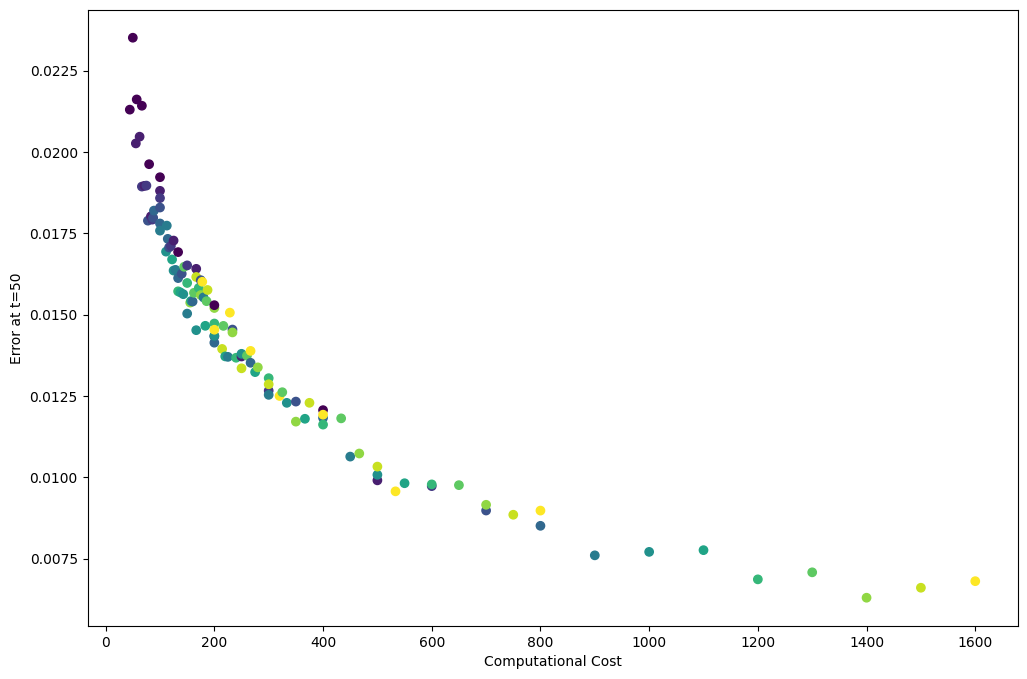

In [27]:
plot_x = []
plot_y = []
plot_M = []

for key in errors.keys():
    for item in errors[key]:
        plot_x.append(key)
        plot_y.append(item[1])
        plot_M.append(item[0])

plt.figure(figsize=(12, 8))
plt.scatter(plot_x,plot_y,c=plot_M)
plt.xlabel('Computational Cost')
plt.ylabel('Error at t=50')

In [28]:
error_compareSameCC = errors
keys_to_remove = [key for key, value in error_compareSameCC.items() if isinstance(value, list) and len(value) == 1]

# Remove the keys
for key in keys_to_remove:
    del error_compareSameCC[key]

print(error_compareSameCC)

{66.66666666666667: [(4, 0.021422215073435696), (6, 0.018936758057433997)], 100.0: [(4, 0.01922492445146585), (5, 0.018806032113060388), (6, 0.018582611584324622), (8, 0.017802262183655285), (9, 0.017581662423323877)], 125.0: [(5, 0.017276844408715065), (10, 0.016354404159513634)], 133.33333333333334: [(4, 0.016922131633586853), (8, 0.016122749364320368), (12, 0.015715835739231136)], 150.0: [(6, 0.016513554674463405), (9, 0.01503091454190003), (12, 0.015972725435930615)], 166.66666666666669: [(5, 0.01640733643846947), (10, 0.014521001154237061), (15, 0.016157015163714747)], 175.0: [(7, 0.016058399161957587), (14, 0.015601113346699471)], 200.0: [(4, 0.015289828821280873), (6, 0.014332026342795668), (8, 0.014136314039448448), (10, 0.01434849985594495), (12, 0.014725956900594453), (16, 0.014535025405521968)], 233.33333333333334: [(7, 0.014540220058150791), (14, 0.014452311832782774)], 250.0: [(5, 0.013711806069903718), (10, 0.013794505988991537), (15, 0.013348507698362974)], 266.666666666

In [45]:
for key in error_compareSameCC.keys():
    print("Computational Cost:",key)
    items = np.array(error_compareSameCC[key])
    print("M:",items[:,0])
    print("Best M:",items[np.argmin(items[:,1])][0])
    print("Best error:", np.min(items[:,1]))
    print()

Computational Cost: 66.66666666666667
M: [4. 6.]
Best M: 6.0
Best error: 0.018936758057433997

Computational Cost: 100.0
M: [4. 5. 6. 8. 9.]
Best M: 9.0
Best error: 0.017581662423323877

Computational Cost: 125.0
M: [ 5. 10.]
Best M: 10.0
Best error: 0.016354404159513634

Computational Cost: 133.33333333333334
M: [ 4.  8. 12.]
Best M: 12.0
Best error: 0.015715835739231136

Computational Cost: 150.0
M: [ 6.  9. 12.]
Best M: 9.0
Best error: 0.01503091454190003

Computational Cost: 166.66666666666669
M: [ 5. 10. 15.]
Best M: 10.0
Best error: 0.014521001154237061

Computational Cost: 175.0
M: [ 7. 14.]
Best M: 14.0
Best error: 0.015601113346699471

Computational Cost: 200.0
M: [ 4.  6.  8. 10. 12. 16.]
Best M: 8.0
Best error: 0.014136314039448448

Computational Cost: 233.33333333333334
M: [ 7. 14.]
Best M: 14.0
Best error: 0.014452311832782774

Computational Cost: 250.0
M: [ 5. 10. 15.]
Best M: 15.0
Best error: 0.013348507698362974

Computational Cost: 266.6666666666667
M: [ 8. 16.]
Best M